In [16]:
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import tensorflow as tf

from ssd_v2 import SSD300v2
from ssd_utils import BBoxUtility
from tensorflow.contrib.tensorboard.plugins import projector
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

In [17]:
voc_classes = ['kitkat']
NUM_CLASSES = len(voc_classes) + 1

In [18]:
input_shape=(300, 300, 3)
model = SSD300v2(input_shape, num_classes=NUM_CLASSES)
model.load_weights('./2018-02-13-wight/weights.04-1.81.hdf5', by_name=True)
bbox_util = BBoxUtility(NUM_CLASSES)

(None, 17328) conv4_3_norm_mbox_loc_flat
(None, 8664) conv4_3_norm_mbox_conf_flat
Tensor("conv4_3_1/conv4_3_norm_mbox_priorbox/Tile:0", shape=(?, 4332, 8), dtype=float32) conv4_3_norm_mbox_priorbox
7308 num_boxes
(None, 29232) mbox_loc
(None, 14616) mbox_conf
Tensor("mbox_1/mbox_loc_final/Reshape:0", shape=(?, 7308, 4), dtype=float32) locatation
Tensor("mbox_1/mbox_conf_final/truediv:0", shape=(?, 7308, 2), dtype=float32) conf
Tensor("mbox_1/mbox_priorbox/concat:0", shape=(?, 7308, 8), dtype=float32) priorbox
(?, 7308, 14) predictions
Tensor("predictions_1/concat:0", shape=(?, 7308, 14), dtype=float32) predictions


In [19]:
inputs = []
images = []
img_path = './pics/1.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/2.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/3.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/4.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/5.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

In [21]:
preds = model.predict(inputs, batch_size=1, verbose=1)

5/5 [==============================] - 7s     


In [22]:
results = bbox_util.detection_out(preds)

mbox_log is [[[-0.15583988 -0.23899221 -0.07051973  0.48911387]
  [ 0.01725886 -0.4649525  -0.40191397  1.00343621]
  [-0.67562377 -0.31786743  0.40418261  0.39673749]
  ..., 
  [-0.20987001  0.55281216  1.65204942  0.30625403]
  [-0.12655407  0.49719107 -0.00076418  2.49498248]
  [-0.22235225  0.29803333  1.85081279  0.19887878]]

 [[-0.86700487 -0.84150517 -0.58066171  0.45553941]
  [-0.47294477 -0.44502339 -0.65359217  0.8231079 ]
  [-0.88392496 -0.55731601 -0.1572333   0.27215689]
  ..., 
  [-0.11629831  0.42948854  1.43237293  0.23533964]
  [-0.06796277  0.40235478  0.02069762  2.17218614]
  [-0.0919199   0.24070218  1.59095836  0.14166279]]

 [[-0.39018029 -0.43511847 -0.18847488  0.12194216]
  [-0.281672   -0.3828958  -0.35967797  0.6936909 ]
  [-0.71296942 -0.61035365  0.25798991  0.06699191]
  ..., 
  [-0.17356402  0.51378471  1.55350173  0.28746724]
  [-0.10604552  0.47685117 -0.01171609  2.41716647]
  [-0.18133613  0.29250252  1.74266577  0.17578982]]

 [[-0.08709534 -0.2591

In [23]:
%%time
a = model.predict(inputs, batch_size=1)
b = bbox_util.detection_out(preds)

mbox_log is [[[-0.15583988 -0.23899221 -0.07051973  0.48911387]
  [ 0.01725886 -0.4649525  -0.40191397  1.00343621]
  [-0.67562377 -0.31786743  0.40418261  0.39673749]
  ..., 
  [-0.20987001  0.55281216  1.65204942  0.30625403]
  [-0.12655407  0.49719107 -0.00076418  2.49498248]
  [-0.22235225  0.29803333  1.85081279  0.19887878]]

 [[-0.86700487 -0.84150517 -0.58066171  0.45553941]
  [-0.47294477 -0.44502339 -0.65359217  0.8231079 ]
  [-0.88392496 -0.55731601 -0.1572333   0.27215689]
  ..., 
  [-0.11629831  0.42948854  1.43237293  0.23533964]
  [-0.06796277  0.40235478  0.02069762  2.17218614]
  [-0.0919199   0.24070218  1.59095836  0.14166279]]

 [[-0.39018029 -0.43511847 -0.18847488  0.12194216]
  [-0.281672   -0.3828958  -0.35967797  0.6936909 ]
  [-0.71296942 -0.61035365  0.25798991  0.06699191]
  ..., 
  [-0.17356402  0.51378471  1.55350173  0.28746724]
  [-0.10604552  0.47685117 -0.01171609  2.41716647]
  [-0.18133613  0.29250252  1.74266577  0.17578982]]

 [[-0.08709534 -0.2591

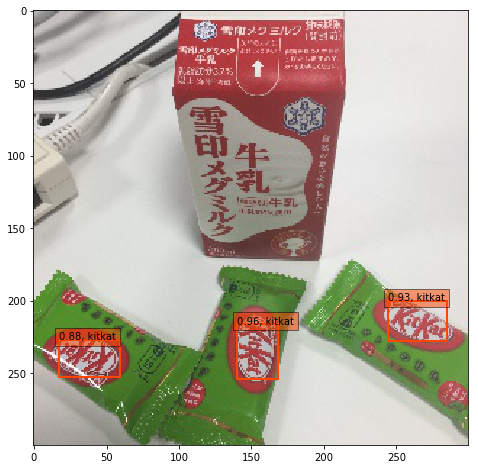

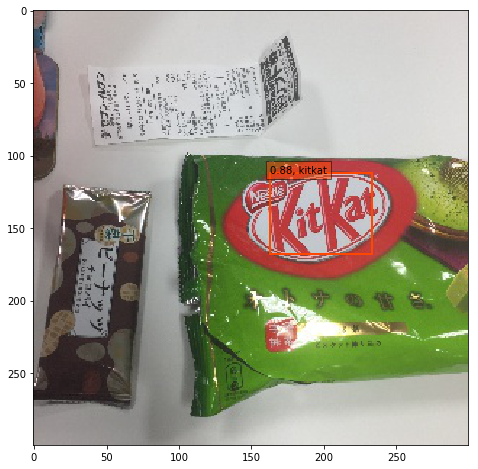

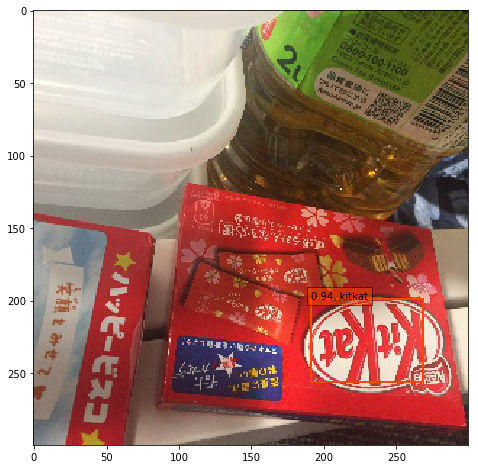

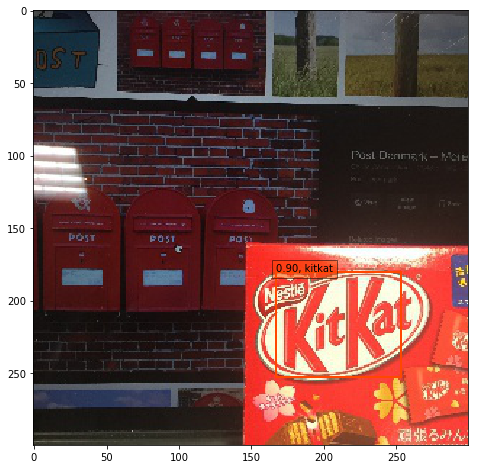

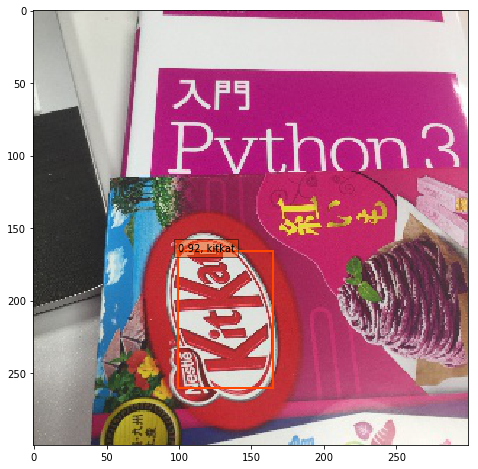

In [24]:
for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()